<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming And Numerical Methods: A Guide For Engineers And Scientists](); the content is available [on GitHub]().*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book]()!*

<!--NAVIGATION-->
< [16.3 Least Squares Regression Derivation (Multivariable Calculus)](chapter16.03-Least-Squares-Regression-Derivation-Multivariable-Calculus.ipynb)  | [Contents](Index.ipynb) | [16.5 Least Square Regression for Nonlinear Functions](chapter16.05-Least-Square-Regression-for-Nonlinear-Functions.ipynb)    >

# Least Squares Regression in Python

Recall that if we enumerate the estimation of the data at each data point, $x_i$, this gives us the following system of equations:

\begin{eqnarray*}
&&\hat{y}(x_1) = {\alpha}_1 f_1(x_1) + {\alpha}_2 f_2(x_1) + \cdots + {\alpha}_n f_n(x_1),\\
&&\hat{y}(x_2) = {\alpha}_1 f_1(x_2) + {\alpha}_2 f_2(x_2) + \cdots + {\alpha}_n f_n(x_2),\\
&&\qquad\qquad\qquad\qquad\qquad \cdots\\
&&\hat{y}(x_m) = {\alpha}_1 f_1(x_m) + {\alpha}_2 f_2(x_m) + \cdots + {\alpha}_n f_n(x_m).
\end{eqnarray*}

If the data was absolutely perfect (i.e., no noise), then the estimation function would go through all the data points, resulting in the following system of equations:

\begin{eqnarray*}
&&y_1 = {\alpha}_1 f_1(x_1) + {\alpha}_2 f_2(x_1) + \cdots + {\alpha}_n
f_n(x_1),\\
&&y_2 = {\alpha}_1 f_1(x_2) + {\alpha}_2 f_2(x_2) + \cdots + {\alpha}_n
f_n(x_2),\\
&&\qquad\qquad\qquad\qquad\cdots\\
&&y_m = {\alpha}_1 f_1(x_m) + {\alpha}_2 f_2(x_m) + \cdots + {\alpha}_n f_n(x_m).
\end{eqnarray*}

If we take $A$ to be as defined previously, this would result in the matrix equation
$$
Y = A{\beta}.
$$

However, since the data is not perfect, there will not be an estimation function that can go through all the data points, and this system will have $\textit{no solution}$. Therefore, we need to use the least square regression that we derived in the previous two sections to get a solution. 

$${\beta} = (A^T A)^{-1} A^T Y$$

**TRY IT!** Consider the artificial data created by $\textit{x = np.linspace(0, 1, 101)}$ and $\textit{y = 1 + x + x * np.random.random(len(x))}$. Do a least squares regression with an estimation function defined by $\hat{y}=\alpha_1x+\alpha_2$. Plot the data points along with the least squares regression. Note that we expect $\alpha_1=1.5$ and $\alpha_2=1.0$ based on this data. Due to the random noise we added into the data, your results maybe slightly different.   

### Use direct inverse method

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [2]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [3]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

In [4]:
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.48472026]
 [0.98821699]]


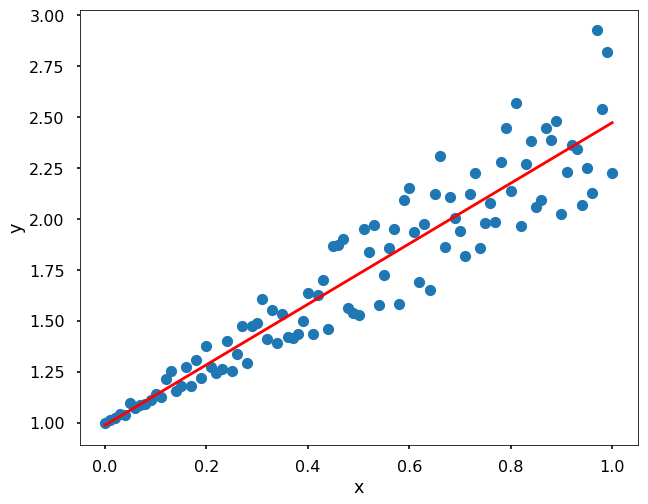

In [5]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'o')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In Python, there are many different ways to conduct the least square regression. For example, we can use packages as *numpy*, *scipy*, *statsmodels*, *sklearn* and so on to get a least square solution. Here we will use the above example and introduce you more ways to do it. Feel free to choose one you like. 

### Use the pseudoinverse

We talked before that the $(A^T A)^{-1} A^T$ is called the pseudo-inverse, therefore, we could use the *pinv* function in *numpy* to directly calculate it. 

In [6]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.48472026]
 [0.98821699]]


### Use numpy.linalg.lstsq

Actually, *numpy* has already implemented the least square methods that we can just call the function to get a solution. The function will return more things than the solution itself, please check the documentation for details. 

In [7]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.48472026]
 [0.98821699]]


### Use optimize.curve_fit from scipy

This scipy function is actually very powerful, that it can fit not only linear functions, but many different function forms, such as non-linear function. Here we will show the linear example from above. Note that, using this function, we don't need to turn y into a column vector. 

In [8]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [9]:
def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

[1.5287569  0.97806637]


<!--NAVIGATION-->
< [16.3 Least Squares Regression Derivation (Multivariable Calculus)](chapter16.03-Least-Squares-Regression-Derivation-Multivariable-Calculus.ipynb)  | [Contents](Index.ipynb) | [16.5 Least Square Regression for Nonlinear Functions](chapter16.05-Least-Square-Regression-for-Nonlinear-Functions.ipynb)    >